In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
df = pd.read_csv('https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/formart_house.csv')

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crim     507 non-null    object
 1   zn       507 non-null    object
 2   indus    507 non-null    object
 3   chas     507 non-null    object
 4   nox      507 non-null    object
 5   rm       507 non-null    object
 6   age      507 non-null    object
 7   dis      507 non-null    object
 8   rad      507 non-null    object
 9   tax      507 non-null    object
 10  ptratio  507 non-null    object
 11  b        507 non-null    object
 12  lstat    507 non-null    object
 13  medv     507 non-null    object
dtypes: object(14)
memory usage: 55.6+ KB


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,507,507,507,507,507,507,507,507,507,507,507,507,507,507
unique,505,27,77,3,82,447,357,413,10,67,47,358,456,230
top,0.01501,0.0,18.1,0,0.538,5.713,100.0,3.4952,24,666,20.2,396.9,7.79,50.0
freq,2,372,132,471,23,3,43,5,132,132,140,121,3,16


EDA

In [17]:
df[df["medv"]== "?"]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
506,is,not,a,ro,ck,et,sc,ie,nce,i,sn,'t,it,?


In [19]:
df.iloc[506]

crim        is
zn         not
indus        a
chas        ro
nox         ck
rm          et
age         sc
dis         ie
rad        nce
tax          i
ptratio     sn
b           't
lstat       it
medv         ?
Name: 506, dtype: object

In [7]:
df = df.drop([506],axis=0)

In [8]:
df = df.astype(float)

In [28]:
df[df["medv"]==df["medv"].min()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0


In [29]:
df[df["medv"]==df["medv"].max()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


In [47]:
def distribution(x):
    # fig = plt.figure(figsize=(8,4))
    sns.histplot(df,x=x,kde=True)

In [37]:
columns = df.columns
columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

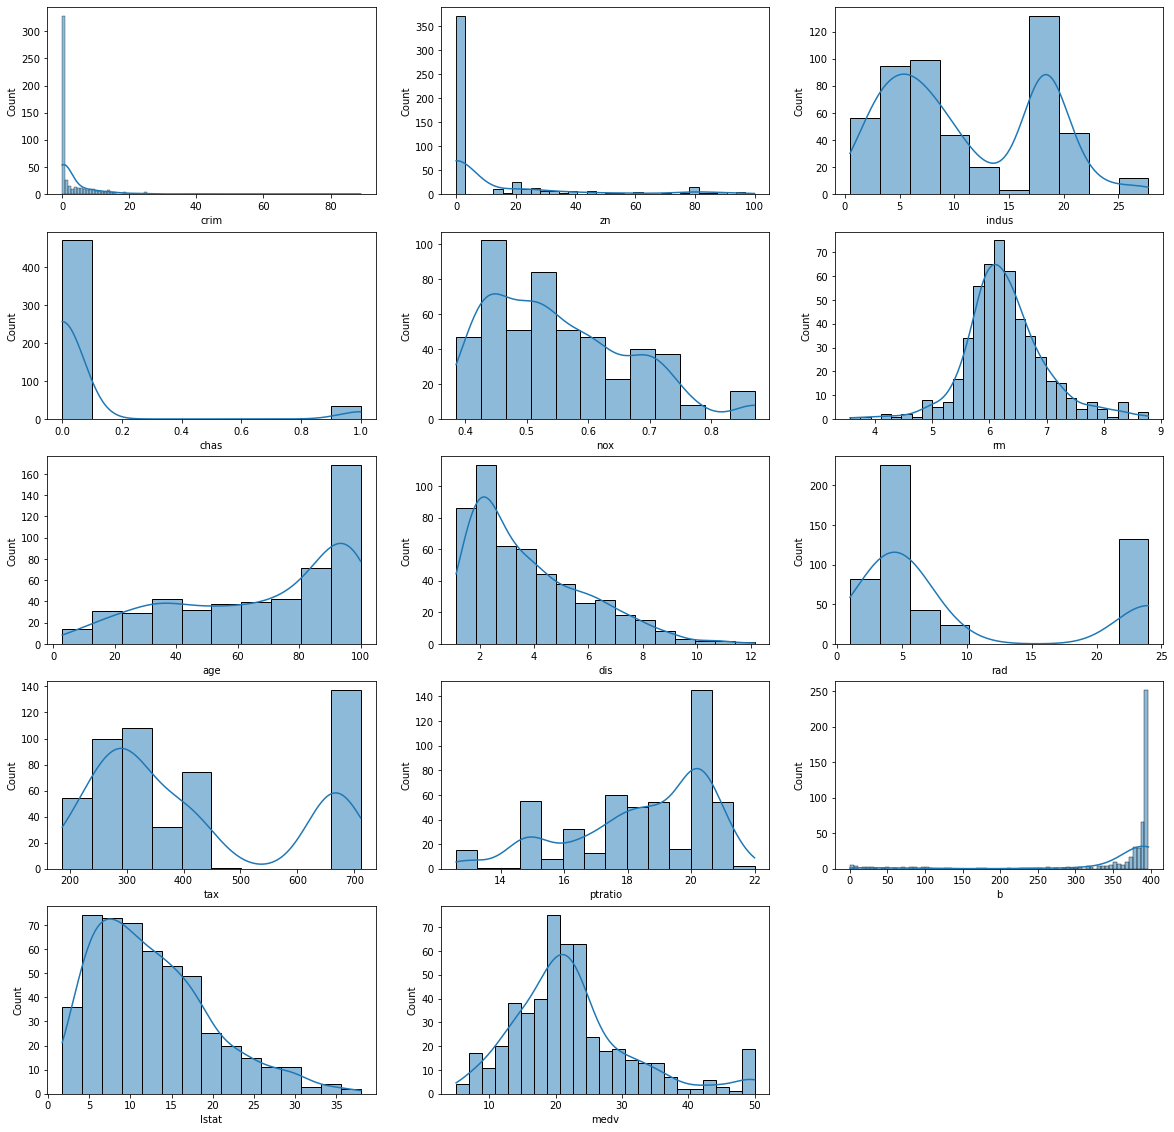

In [51]:
fig = plt.figure(figsize=(20,20))
for k in range(0,14):
    ax = fig.add_subplot(5,3,k+1)
    distribution(columns[k])
    
   

In [53]:
def scatterplot(x):
    sns.scatterplot(data=df,x=x,y="medv")

In [54]:
columns = df.columns[:-1]
columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

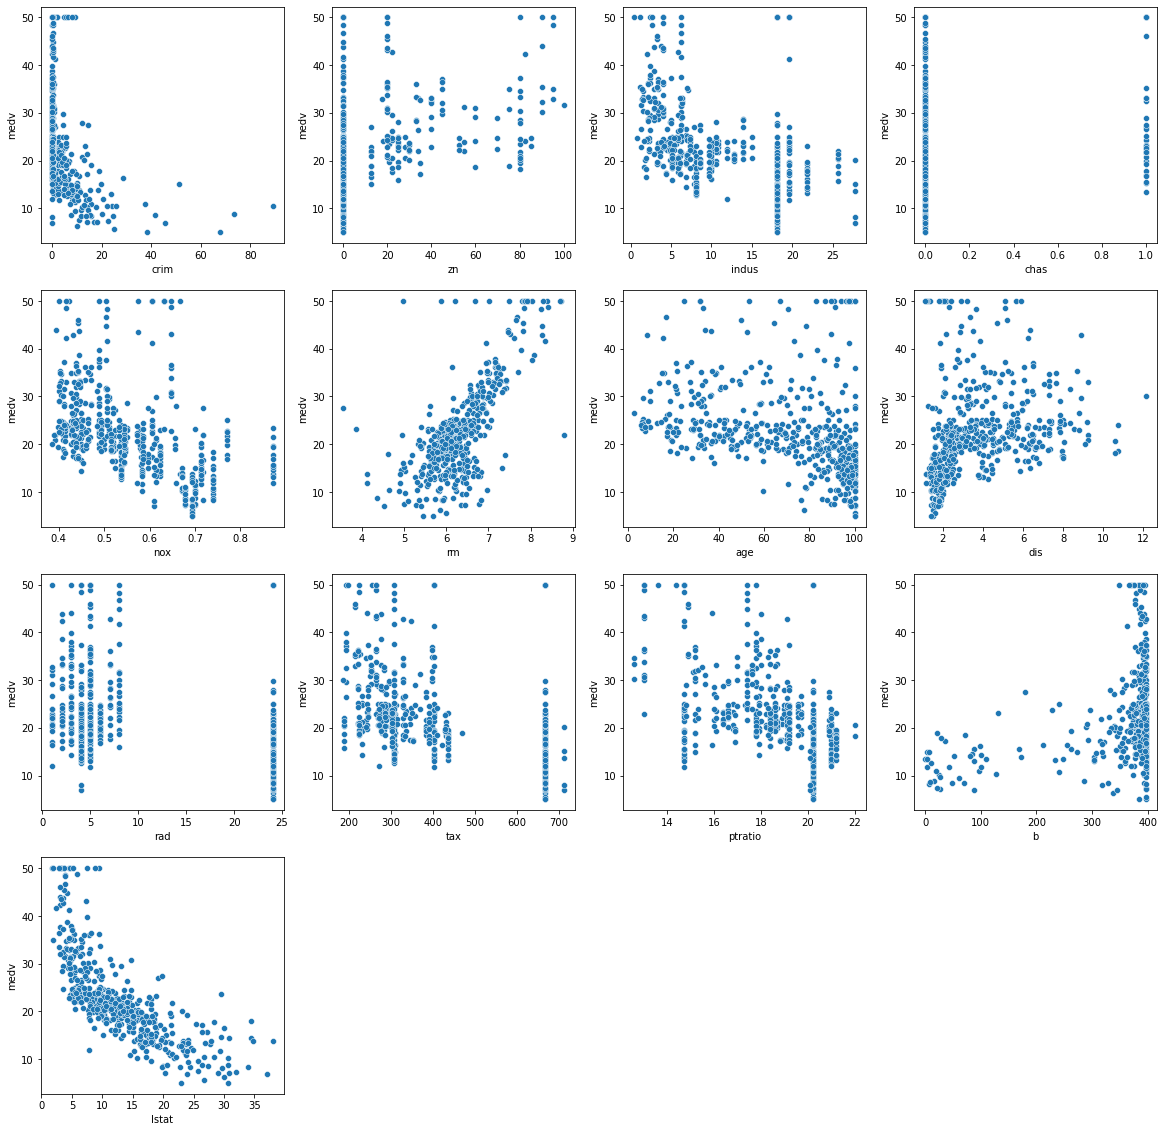

In [57]:
fig = plt.figure(figsize=(20,20))
for k in range(0,13):
    ax = fig.add_subplot(4,4,k+1)
    scatterplot(columns[k])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chas', ylabel='medv'>

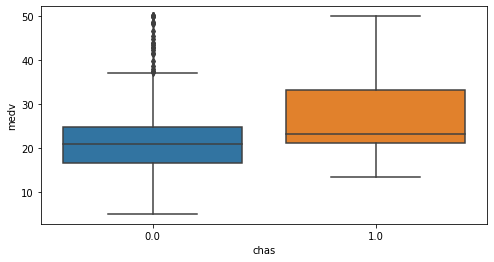

In [42]:
plt.figure(figsize=(8,4))
sns.boxplot(df["chas"],df["medv"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chas', ylabel='count'>

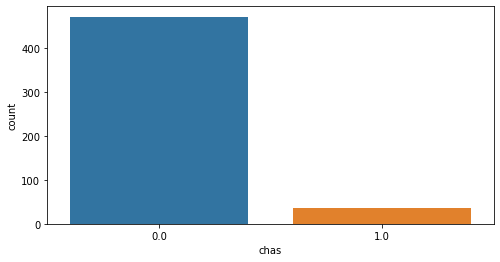

In [50]:
plt.figure(figsize=(8,4))
sns.countplot(df["chas"])

In [51]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

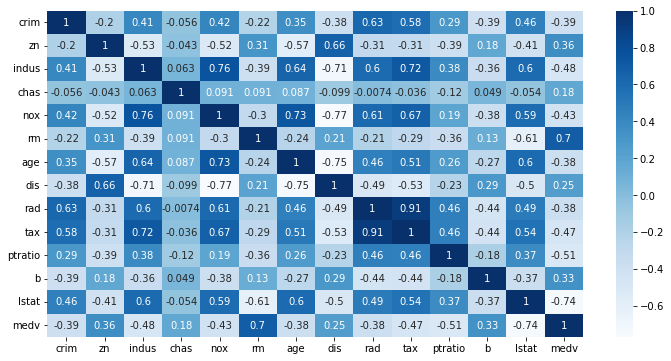

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap="Blues",annot=True)

Modelling

In [56]:
X = df.drop(["medv"],axis=1)

In [57]:
y = df["medv"]

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [60]:
scaler = StandardScaler()

In [61]:
X_train = scaler.fit_transform(X_train)

In [62]:
X_test = scaler.transform(X_test)

In [63]:
model = LinearRegression()

In [64]:
model.fit(X_train,y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [68]:
r2 = r2_score(y_test,y_pred)
r2

0.7121298549452948

In [69]:
mae = mean_absolute_error(y_test,y_pred)
mae

3.898263378276974

In [71]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

5.488082407493911

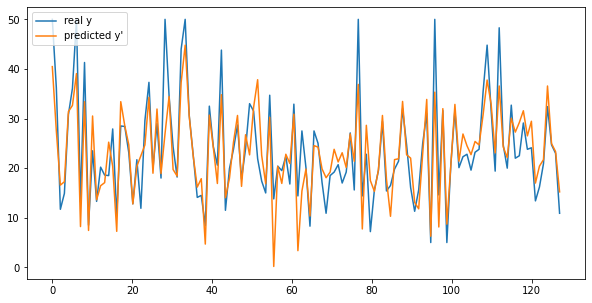

In [73]:
length = y_pred.shape[0] 
x = np.linspace(0,length,length)

plt.figure(figsize=(10,5))
plt.plot(x, y_test, label='real y')
plt.plot(x, y_pred, label="predicted y'")
plt.legend(loc=2);

In [74]:
joblib.dump(model,"house_model.pkl")

['house_model.pkl']